In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
pd.options.display.max_columns = None
%matplotlib inline
from IPython.display import display

In [51]:
movies_all=pd.read_csv('../movies.csv')
movies_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 33 columns):
Unnamed: 0               796 non-null int64
Title                    796 non-null object
Release Date             796 non-null object
IMDB Rating              796 non-null float64
MPAA Rating              796 non-null float64
Runtime                  796 non-null float64
Actor Score              796 non-null float64
Action                   796 non-null float64
Adventure                796 non-null float64
Animation                796 non-null float64
Biography                796 non-null float64
Comedy                   796 non-null float64
Crime                    796 non-null float64
Drama                    796 non-null float64
Family                   796 non-null float64
Fantasy                  796 non-null float64
History                  796 non-null float64
Horror                   796 non-null float64
Music                    796 non-null float64
Mystery                  

In [52]:
movies_all.head()

,Unnamed: 0,Title,Release Date,IMDB Rating,MPAA Rating,Runtime,Actor Score,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,SciFi,Sport,Thriller,War,Western,Opening Weekend Gross,Opening Theaters,Peak Season,Budget,Total US Gross,UK Gross,Worldwide Gross ex US
0,4,Deadpool 2,2018-05-18,7.9,4.0,119.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125507153.0,4349.0,1.0,110000000,318490675.0,44625880,415754495
1,5,Crazy Rich Asians,2018-08-15,7.5,3.0,120.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26510140.0,3384.0,0.0,30000000,171367368.0,7088511,57000000
2,8,Hotel Transylvania 3: Summer Vacation,2018-07-13,6.3,2.0,97.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44076225.0,4267.0,1.0,44076225152018,166735989.0,24882543,350000000
3,9,Incredibles 2,2018-06-15,8.0,2.0,118.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182687905.0,4410.0,1.0,200000000,607498593.0,72640083,620000000
4,11,BlacKkKlansman,2018-08-10,7.8,4.0,135.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10845330.0,1512.0,0.0,15000000,48271960.0,8162767,36300000


In [53]:
del movies_all['Unnamed: 0']

In [54]:
movies_all = movies_all.dropna()
# dropped all null values for sake of time

In [55]:
# clean data set by removing any movies with fewer than 100 theater locations
movies_all = movies_all[movies_all['Opening Theaters'] > 100]

In [56]:
movies_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 790
Data columns (total 32 columns):
Title                    588 non-null object
Release Date             588 non-null object
IMDB Rating              588 non-null float64
MPAA Rating              588 non-null float64
Runtime                  588 non-null float64
Actor Score              588 non-null float64
Action                   588 non-null float64
Adventure                588 non-null float64
Animation                588 non-null float64
Biography                588 non-null float64
Comedy                   588 non-null float64
Crime                    588 non-null float64
Drama                    588 non-null float64
Family                   588 non-null float64
Fantasy                  588 non-null float64
History                  588 non-null float64
Horror                   588 non-null float64
Music                    588 non-null float64
Mystery                  588 non-null float64
Romance                

In [57]:
# trying to find most common genres in data set to isolate these as one feature
print(movies_all['Action'].value_counts())
print(movies_all['Adventure'].value_counts())
print(movies_all['Animation'].value_counts())
print(movies_all['Biography'].value_counts())
print(movies_all['Crime'].value_counts())
print(movies_all['Drama'].value_counts())
print(movies_all['Family'].value_counts())
print(movies_all['Fantasy'].value_counts())
print(movies_all['History'].value_counts())
print(movies_all['Horror'].value_counts())
print(movies_all['Music'].value_counts())
print(movies_all['Mystery'].value_counts())
print(movies_all['Romance'].value_counts())
print(movies_all['Sport'].value_counts())
print(movies_all['Thriller'].value_counts())

0.0    488
1.0    100
Name: Action, dtype: int64
0.0    433
1.0    155
Name: Adventure, dtype: int64
0.0    502
1.0     86
Name: Animation, dtype: int64
0.0    580
1.0      8
Name: Biography, dtype: int64
0.0    516
1.0     72
Name: Crime, dtype: int64
0.0    444
1.0    144
Name: Drama, dtype: int64
0.0    510
1.0     78
Name: Family, dtype: int64
0.0    547
1.0     41
Name: Fantasy, dtype: int64
0.0    588
Name: History, dtype: int64
0.0    579
1.0      9
Name: Horror, dtype: int64
0.0    567
1.0     21
Name: Music, dtype: int64
0.0    582
1.0      6
Name: Mystery, dtype: int64
0.0    439
1.0    149
Name: Romance, dtype: int64
0.0    574
1.0     14
Name: Sport, dtype: int64
0.0    582
1.0      6
Name: Thriller, dtype: int64


In [58]:
# Top categories (7 given)
movies_all['Top Genres'] = movies_all['Action'] + movies_all['Adventure'] + movies_all['Animation'] + movies_all['Crime'] + movies_all['Drama']+ movies_all['Family']+ movies_all['Romance']

In [59]:
movies_all = movies_all[['Title','Release Date','Peak Season','IMDB Rating','MPAA Rating','Runtime','Actor Score','Top Genres','Opening Weekend Gross','Opening Theaters','Budget','Worldwide Gross ex US']]

In [60]:
movies_all.sample()

,Title,Release Date,Peak Season,IMDB Rating,MPAA Rating,Runtime,Actor Score,Top Genres,Opening Weekend Gross,Opening Theaters,Budget,Worldwide Gross ex US
472,My Big Fat Greek Wedding 2,2016-03-25,0.0,6.0,3.0,94.0,1.0,1.0,17861950.0,3133.0,18000000,29233646


In [61]:
# initial look at correlations
movies_all.corr()

,Peak Season,IMDB Rating,MPAA Rating,Runtime,Actor Score,Top Genres,Opening Weekend Gross,Opening Theaters,Budget,Worldwide Gross ex US
Peak Season,1.000000,0.088701,-0.118992,0.038624,0.171726,0.092540,0.267332,0.224165,0.061585,0.297721
IMDB Rating,0.088701,1.000000,0.083488,0.359223,0.271101,0.169644,0.310621,0.020450,0.095928,0.371104
MPAA Rating,-0.118992,0.083488,1.000000,0.243973,0.086005,-0.401436,-0.192175,-0.327778,-0.199644,-0.263671
Runtime,0.038624,0.359223,0.243973,1.000000,0.116386,0.043548,0.072878,-0.065166,-0.100328,0.042057
Actor Score,0.171726,0.271101,0.086005,0.116386,1.000000,-0.009223,0.367962,0.270752,0.117955,0.391667
Top Genres,0.092540,0.169644,-0.401436,0.043548,-0.009223,1.000000,0.197908,0.161273,0.196853,0.333239
Opening Weekend Gross,0.267332,0.310621,-0.192175,0.072878,0.367962,0.197908,1.000000,0.600403,0.245241,0.764147
Opening Theaters,0.224165,0.020450,-0.327778,-0.065166,0.270752,0.161273,0.600403,1.000000,0.206201,0.478100
Budget,0.061585,0.095928,-0.199644,-0.100328,0.117955,0.196853,0.245241,0.206201,1.000000,0.367956
Worldwide Gross ex US,0.297721,0.371104,-0.263671,0.042057,0.391667,0.333239,0.764147,0.478100,0.367956,1.000000


In [62]:
movies_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 790
Data columns (total 12 columns):
Title                    588 non-null object
Release Date             588 non-null object
Peak Season              588 non-null float64
IMDB Rating              588 non-null float64
MPAA Rating              588 non-null float64
Runtime                  588 non-null float64
Actor Score              588 non-null float64
Top Genres               588 non-null float64
Opening Weekend Gross    588 non-null float64
Opening Theaters         588 non-null float64
Budget                   588 non-null int64
Worldwide Gross ex US    588 non-null int64
dtypes: float64(8), int64(2), object(2)
memory usage: 59.7+ KB


In [63]:
movies_all.dtypes

Title                     object
Release Date              object
Peak Season              float64
IMDB Rating              float64
MPAA Rating              float64
Runtime                  float64
Actor Score              float64
Top Genres               float64
Opening Weekend Gross    float64
Opening Theaters         float64
Budget                     int64
Worldwide Gross ex US      int64
dtype: object

In [64]:
season = ["Peak Season"]
imdb_rating = ["IMDB Rating"]
mpaa_rating = ["MPAA Rating"]
runtime = ["Runtime"]
actor_score = ["Actor Score"]
top_genres = ["Top Genres"]
opening_wknd_gross = ["Opening Weekend Gross"]
opening_theaters = ["Opening Theaters"]
budget = ["Budget"]

In [65]:
# Columns to study
X_columns = season + imdb_rating + mpaa_rating + runtime + actor_score + top_genres + opening_wknd_gross + opening_theaters + budget

In [66]:
y = movies_all["Worldwide Gross ex US"]
X = movies_all.loc[:,X_columns]

In [67]:
# baseline model & OLS regression summary stats
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Worldwide Gross ex US   R-squared:                       0.683
Model:                               OLS   Adj. R-squared:                  0.678
Method:                    Least Squares   F-statistic:                     138.1
Date:                   Wed, 17 Oct 2018   Prob (F-statistic):          8.99e-138
Time:                           21:38:25   Log-Likelihood:                -11434.
No. Observations:                    588   AIC:                         2.289e+04
Df Residuals:                        578   BIC:                         2.293e+04
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -8.18e+07   3.03e+07     -2.701      0.007   -1.41e+08   -2.23e+07
Peak Season            1.948e+07    5.9e+06      3.302      0.001     7.9e+06    3.11e+07
IMDB Rating            1.642e+07   3.43e+06      4.780      0.000    9.67e+06    2.32e+07
MPAA Rating           -1.024e+07   4.01e+06     -2.553      0.011   -1.81e+07   -2.36e+06
Runtime               -3.676e+05   2.46e+05     -1.497      0.135    -8.5e+05    1.15e+05
Actor Score            1.154e+07   2.49e+06      4.637      0.000    6.65e+06    1.64e+07
Top Genres             2.053e+07   4.12e+06      4.988      0.000    1.24e+07    2.86e+07
Opening Weekend Gross     3.5330      0.197     17.899      0.000       3.145       3.921
Opening Theaters       -866.7199   4270.338     -0.203      0.839   -9253.992    7520.552
Budget                 1.722e-06   2.88e-07      5.979      0.000    1.16e-06    2.29e-06
==============================================================================
Omnibus:                      279.761   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.101
Skew:                           1.899   Prob(JB):                         0.00
Kurtosis:                      12.259   Cond. No.                     1.18e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

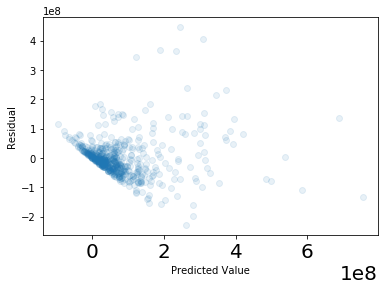

In [68]:
# Baseline residual plot not great

y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

## Method 1: Train / Validation / Test

In [69]:
# Hold out 20% of data for final test set
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) 

# Hold out other 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) 

In [70]:
# Scale data so all features on same scale
# Set up the 3 models we're choosing from
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
# First doing linear regression

In [72]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
lm.score(X_val,y_val)

0.6247714170088718

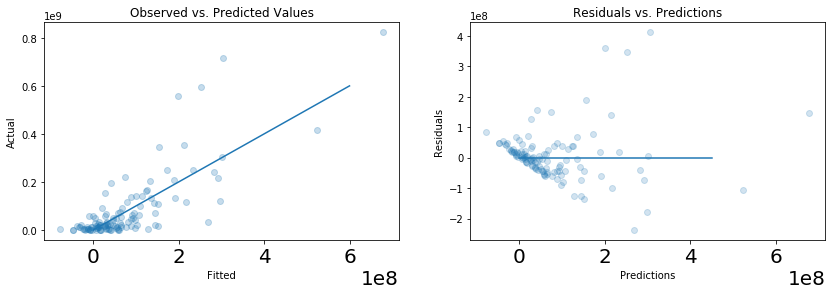

In [74]:
plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = lm.predict(X_val)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25)
plt.plot([0, 600000000], [0, 600000000])
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.pdf")

# Residuals
lm_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, lm_residuals, alpha=.2)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,450000000], [0, 0])
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.pdf");

# slight improvement from before on residual plot

In [75]:
# Coefficients for each feature
list(zip(X_columns,lm.coef_))

[('Peak Season', 24888923.726269484),
 ('IMDB Rating', 19969852.518856935),
 ('MPAA Rating', -5009594.911577724),
 ('Runtime', -406755.3543900779),
 ('Actor Score', 10092522.075220518),
 ('Top Genres', 24911534.180255808),
 ('Opening Weekend Gross', 3.694179211494691),
 ('Opening Theaters', 1028.2049124798557),
 ('Budget', 1.436064316916691e-06)]

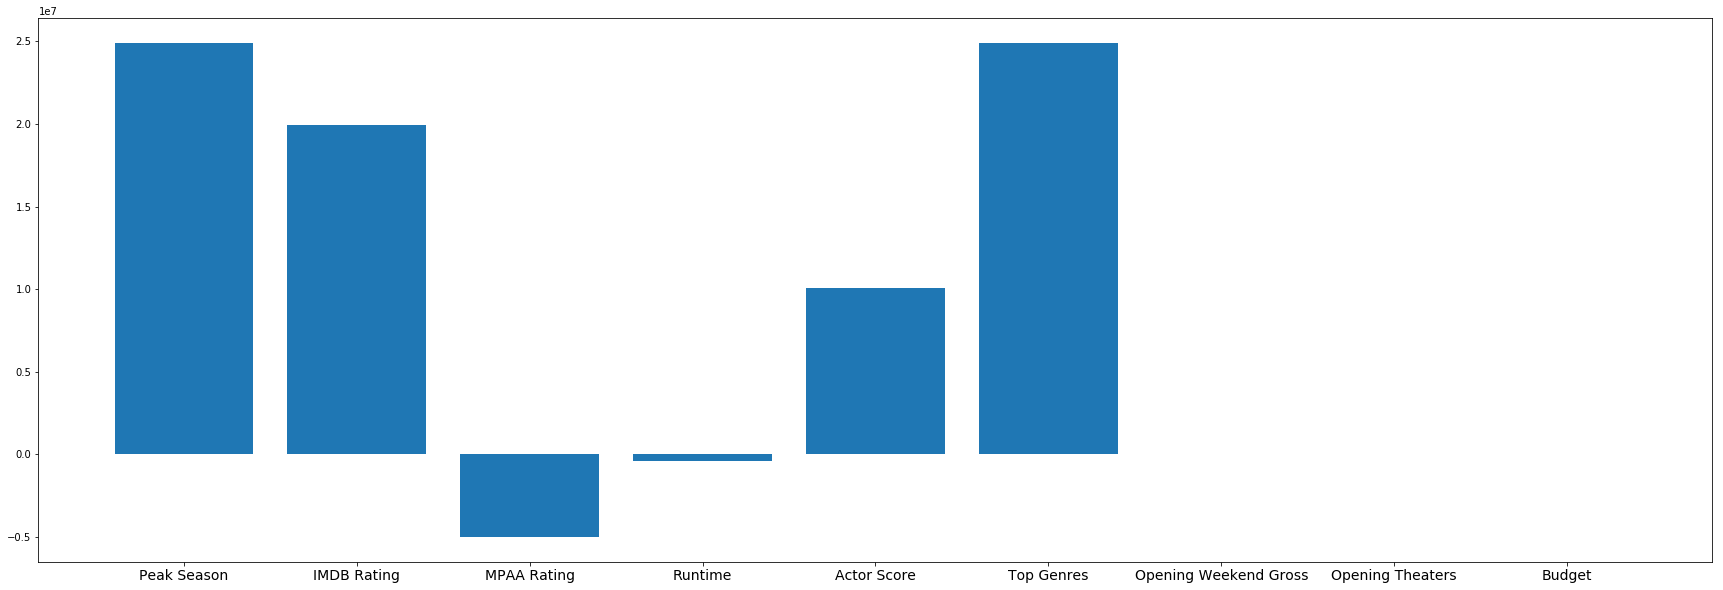

In [76]:
# Important as standardized so can see relative importance
plt.figure(figsize=(30,10))
plt.rc('xtick', labelsize=14)
plt.bar(X_columns,lm.coef_)
plt.savefig("Feature_Plot.pdf");

In [77]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_test,y_pred)

# very high to begin with

163020667.20741352

In [78]:
# Using Ridge regularization and cross validation
# Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)

In [79]:
# Using Lasso regularization
lm_lasso = Lasso()  

In [80]:
# Trying polynomial features for the datasets

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

In [81]:
lm.fit(X_train, y_train)
print('Linear Regression val R^2: %.3f', lm.score(X_val, y_val))

lm_reg.fit(X_train_scaled, y_train)
print('Ridge Regression val R^2: %.3f', lm_reg.score(X_val_scaled, y_val))

lm_lasso.fit(X_train_scaled, y_train)
print('Lasso Regression val R^2: %.3f', lm_lasso.score(X_val_scaled, y_val))

lm_poly.fit(X_train_poly, y_train)
print('Degree 2 polynomial regression val R^2: %.3f', lm_poly.score(X_val_poly, y_val))

Linear Regression val R^2: %.3f 0.6247714170088718
Ridge Regression val R^2: %.3f 0.6248114363226576
Lasso Regression val R^2: %.3f 0.6247261678293667
Degree 2 polynomial regression val R^2: %.3f 0.44392528583303736


In [82]:
# Ridge gives the best score so far
list(zip(X_columns,lm_reg.coef_))

[('Peak Season', 12376367.558509301),
 ('IMDB Rating', 18242605.577632837),
 ('MPAA Rating', -4276366.845533031),
 ('Runtime', -5150553.256900047),
 ('Actor Score', 12361306.299289819),
 ('Top Genres', 19229392.671416994),
 ('Opening Weekend Gross', 65909130.95827021),
 ('Opening Theaters', 1069790.0330689172),
 ('Budget', 13673414.385795608)]

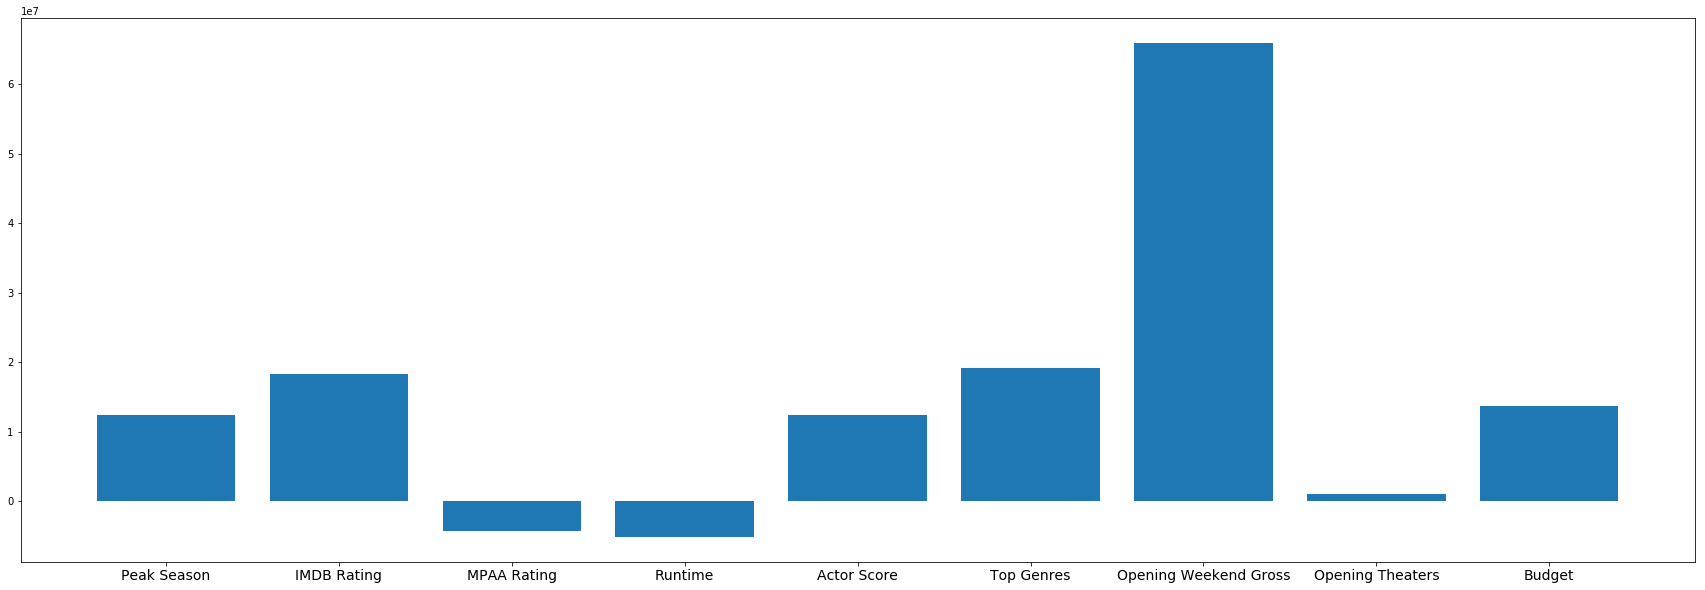

In [106]:
# Important as standardized so can see relative importance
plt.figure(figsize=(30,10))
plt.rc('xtick', labelsize=14)
plt.bar(X_columns,lm_reg.coef_)
plt.savefig("Feature_Plot_Ridge.pdf");

In [111]:
lm_reg.predict(X_test, y_test)

TypeError: predict() takes 2 positional arguments but 3 were given

In [35]:
RMSE(lm_reg.predict(X_val_scaled),y_val)

85576362.824317

## Method 2: Cross-Validation / Test

Idea of CV is to make efficient use of the data available to us (using 80% instead of 60% above), while also performing multiple validation checks. For k-fold CV, we come up with k train/validation splits of the whole chunk of data, in such a way that **each observation is in the validation set exactly 1 time**. As we loop through our CV folds, we will train and validate both models and collect the results to compare at the end. Note that we scale the training features within the CV loop.

In [114]:
y = movies_all["Worldwide Gross ex US"]
X = movies_all.loc[:,X_columns]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [124]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_cv = LinearRegression()
lm_reg_cv = Ridge(alpha=1)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [ ]:
print(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2')))

In [122]:
print(cross_val_score(lm_reg_cv, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_reg_cv, X, y, cv=kf, scoring='r2')))

[ 0.61579173 -0.32579784  0.59130861  0.69818528  0.65115842]
0.44612924185620273


/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.911004e-27
  overwrite_a=True).T
/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.586376e-27
  overwrite_a=True).T
/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.707007e-27
  overwrite_a=True).T
/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accu

In [118]:
lm_lasso_cv = Lasso()
print(cross_val_score(lm_lasso_cv, X, y,
                                cv=kf,       
                                scoring='r2'))
print(np.mean(cross_val_score(lm_lasso_cv, X, y,
                                cv=kf,       
                                scoring='r2')))

[ 0.61601803 -0.32820089  0.59139067  0.69830321  0.65113397]
0.4457289971892651


In [119]:
print(cross_val_score(lm_poly, X, y,    
                                cv=kf,                
                                scoring='r2'))
print(np.mean(cross_val_score(lm_poly, X, y,    
                                cv=kf,                
                                scoring='r2')))

[ 0.61605709 -0.32817012  0.59139815  0.69832358  0.65115437]
0.4457526141932012


## Other Models

In [42]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

0.6604404195123902

In [43]:
RMSE(rf.predict(X_val),y_val)

81411737.25688396

In [44]:
gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.6904404973940899

In [45]:
RMSE(gbm.predict(X_val),y_val)

77732224.84502363

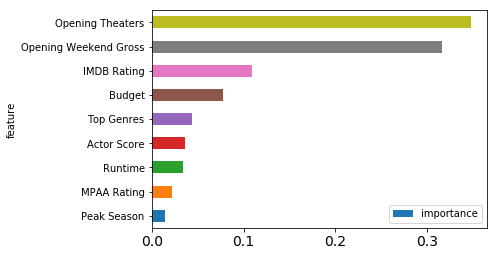

In [112]:
feat_imps = list(zip(X_train.columns,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')
plt.savefig("RandomForestRegressor.pdf")

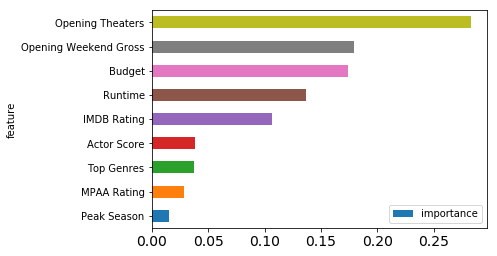

In [113]:
feat_imps = list(zip(X_train.columns,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')
plt.savefig("GradientBoostingRegressor.pdf")

In [48]:
# notes here week03-luther2/03-review_workflow/linear_regression_interp_interactions.ipynb